Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Приоритизация гипотез.

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:

* Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Загрузка и предобработка данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
pd.options.display.max_colwidth = 150
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Тип данных данных и название столбцов соотвествует необходимому,пропусков нет. Корректировка датасета не требуется.

In [5]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
#orders.duplicated().sum()
orders.isna().sum()


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Дубликатов и пропусков нет, название отображены корректно. Изменим лишь тип данных в столбце date.

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
#visitors.duplicated().sum()
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Тут поступим также, изменим тип данных у таблицы date, и все датасеты будут готовы к анализу.

In [12]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Фреймворк ICE и RICE для приоритизации гипотез. 

In [13]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
hypothesis['RICE'] = (hypothesis['Reach']  * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [14]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2


Фреймворки посчитаны и добавлены в таблицу, поочередно применим сортировку, и  проанализируем изменения в порядке позиций.

In [15]:
hypothesis.sort_values(by='ICE', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


In [16]:
hypothesis.sort_values(by='RICE', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


### Вывод

Приоретизация заметно меняется от выбираемого параметра сортировки. Если взглянуть на формулы фреймворков, то станет ясно, что в RICE мы учитываем охват "Reach" он и влияет на лидерство в списке гипотез. Так по ICE лидирующими являются:
* Запустить акцию, дающую скидку на товар в день..
* Добавить два новых канала привлечения трафика..
* Добавить форму подписки на все основные страни..

по RICE:

* Добавить форму подписки на все основные страни...
* Добавить блоки рекомендаций товаров на сайт ин..
* Добавить два новых канала привлечения трафика..	

## Анализ A/B-теста. 

In [17]:
print('Группы учавствующие в тесте: {}'.format(visitors['group'].unique()))


Группы учавствующие в тесте: ['A' 'B']


In [18]:
print('Дата начала теста: {}\n'
      'Дата окончания: {}'.format(visitors['date'].min(), 
                                                 visitors['date'].max()))

Дата начала теста: 2019-08-01 00:00:00
Дата окончания: 2019-08-31 00:00:00


In [19]:
orders_A= orders[orders['group']=='A']
orders_B= orders[orders['group']=='B']
print('Количество пользователей в группе А: {}\n'
      'Количество пользователей в группе В: {}'.format(orders_A['visitorId'].nunique(), 
                                                 orders_B['visitorId'].nunique()))

Количество пользователей в группе А: 503
Количество пользователей в группе В: 586


In [20]:
orders_A= orders[orders['group'] == 'A']['visitorId']
orders_B= orders[orders['group'] == 'B']['visitorId']
orders_AB = orders.query('visitorId in @orders_A and visitorId in @orders_B')
print('Количество пользователей присутствующих в обеих группах: {}'.format(orders_AB['visitorId'].nunique()))

Количество пользователей присутствующих в обеих группах: 58


Предлагаю удалить данных пользователей из нашего датасета, чтобы тест показал корректный результат.

In [21]:
orders = orders.query('visitorId not in @orders_AB["visitorId"]')

Задача

Проанализировать A/B-тест:
* Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
* Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
* Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
* Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделем выводы и предположения.
* Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
*  точечный график количества заказов по пользователям. Сделаем выводы и предположения.
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
* Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
* Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.


Прежде чем строить графики создадим таблицу с накоплением, выведя все необходимые куммулятивные данные из таблиц visitors и orders.

In [22]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersCummulative = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsCummulative = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeDF = ordersCummulative.merge(visitorsCummulative, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeDF.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cummulativeDF)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Разобъем таблицу на группы А и В.

In [23]:
cummulativeA = cummulativeDF[cummulativeDF['group']=='A']
cummulativeB = cummulativeDF[cummulativeDF['group']=='B']

### График кумулятивной выручки по группам.

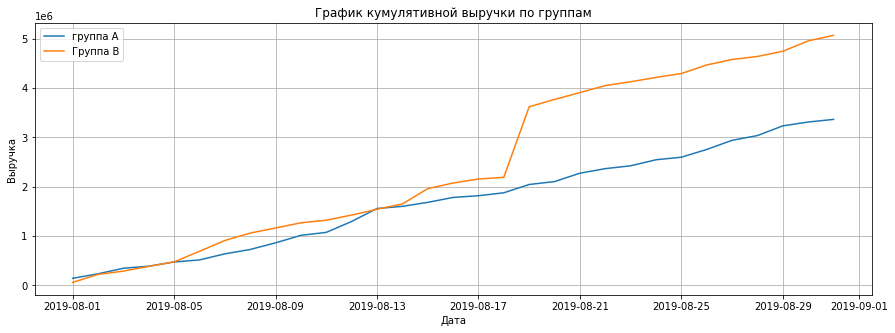

In [24]:
plt.figure(figsize=(15,5))
plt.plot(cummulativeA['date'], cummulativeA['revenue'], label='группа А')
plt.plot(cummulativeB['date'], cummulativeB['revenue'], label='Группа B')
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend();

На протяжении всего наблюдения выручка обеих групп росла.Виден всплеск после середины августа в группе В. Скорее всего это связано с аномальными значениями в датасете.

### График кумулятивного среднего чека по группам.

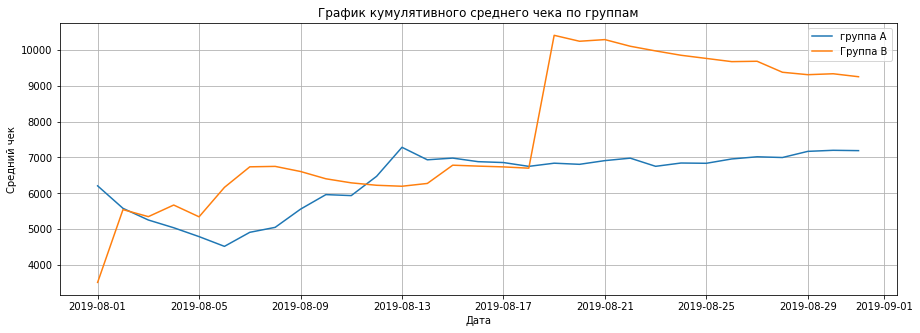

In [25]:
plt.figure(figsize=(15,5))
plt.plot(cummulativeA['date'], cummulativeA['revenue']/cummulativeA['orders'], label='группа А')
plt.plot(cummulativeB['date'], cummulativeB['revenue']/cummulativeB['orders'], label='Группа B')
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Cредний чек')
plt.xlabel('Дата')
plt.legend();


Прослеживается аналогия с предыдущем графиком. Чеки росли на протяжении всего теста, но в группе В опять же произошел всплеск в середине августа. Это наталкивает на мысль,что увеличилась не частота заказов в данной группе, а появился один или несколько аномально крупных заказов

### График относительного изменения кумулятивного среднего чека группы B к группе A

По аналогии с подсчетом конверсии в спринте, создадим доп. таблицы и построим график.

In [26]:
cummulativeAB = cummulativeA.merge(cummulativeB, left_on='date', right_on='date', suffixes=['A', 'B'])

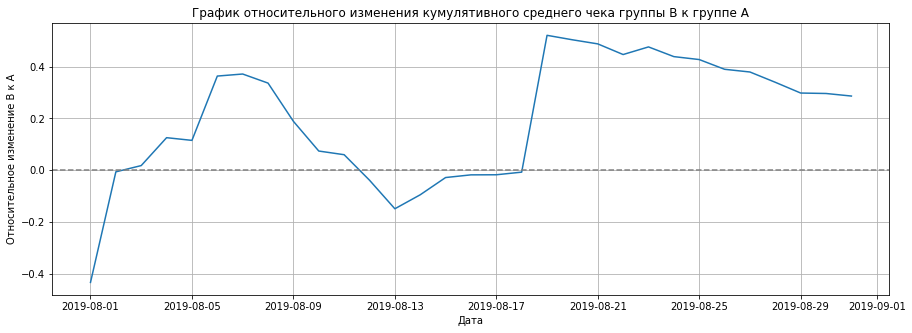

In [27]:
plt.figure(figsize=(15,5))
plt.plot(cummulativeAB['date'], (cummulativeAB['revenueB']/cummulativeAB['ordersB'])/ \
         (cummulativeAB['revenueA']/cummulativeAB['ordersA'])-1)

plt.axhline(y=0, color='grey', linestyle = '--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение В к А');


В начале теста группа В показывала себя лучше, затем группа А начала выбиваться в лидеры.
К середине теста  А достигает своих лучших показателей, после чего произошел аномальный отскок в пользу В.
К концу же теста график начинает стабилизироваться и постепенно снижается.

### График кумулятивного среднего количества заказов на посетителя по группам

Добавим новые столбцы, чтобы в дальнейшем построить график отноститльного изменения.

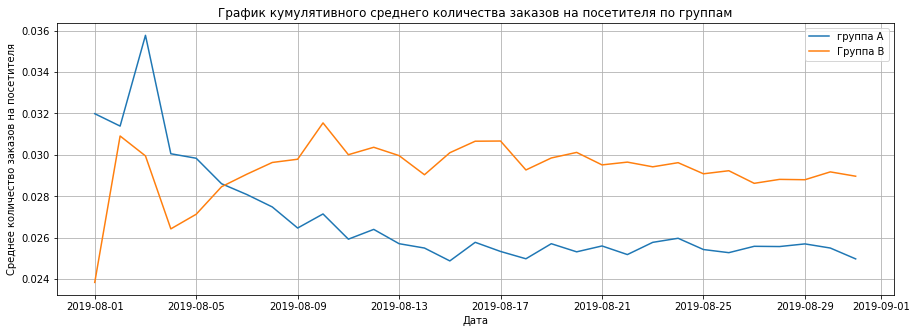

In [28]:
plt.figure(figsize=(15,5))
plt.plot(cummulativeA['date'], cummulativeA['orders']/cummulativeA['visitors'], label='группа А')
plt.plot(cummulativeB['date'], cummulativeB['orders']/cummulativeB['visitors'], label='Группа B')
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Cреднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.legend();

В первые 5 дней видны значительные колебания. Изначально среднее количество заказов росло, но 4 числа была заметная просадка, которую группа А так и не смогла отыграть, Зато группа В вырвалась в явные лидеры на протяжении всего теста.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

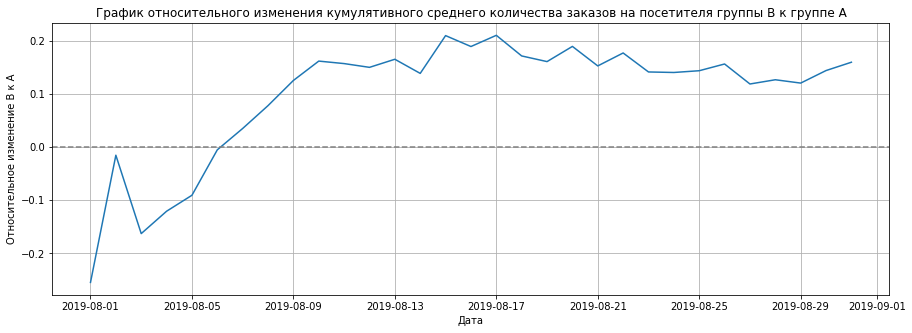

In [29]:
plt.figure(figsize=(15,5))
plt.plot(cummulativeAB['date'], (cummulativeAB['ordersB']/cummulativeAB['visitorsB'])/ \
         (cummulativeAB['ordersA']/cummulativeAB['visitorsA'])-1)

plt.axhline(y=0, color='grey', linestyle = '--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение В к А');

Видно что после 5 августа, когда закончились резкие колбеания, группа В явно лидировала по кум.ср.количеству заказов

### Точечный график количества заказов по пользователям.

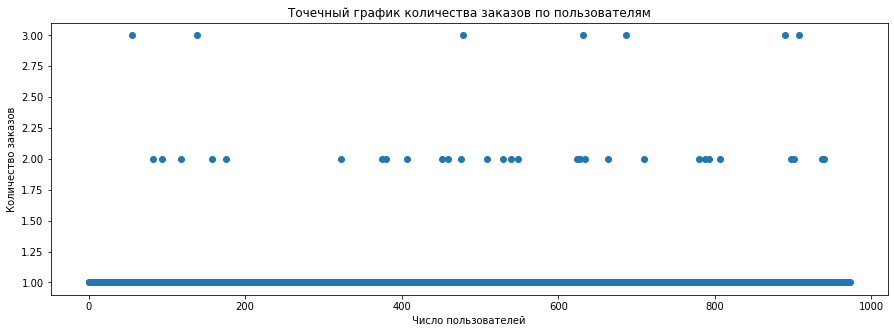

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Число пользователей');

Из точечного графика видно: большинство пользователей совершило 1 и 2 заказа,гораздо реже прослеживаются точки на трех заказах

### Перцентили количества заказов на пользователя.

In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Менее 1 % оформило по 4 заказа, и не больше 5 % от общей массы оформляли больше двух заказов.

### Точечный график стоимостей заказов.

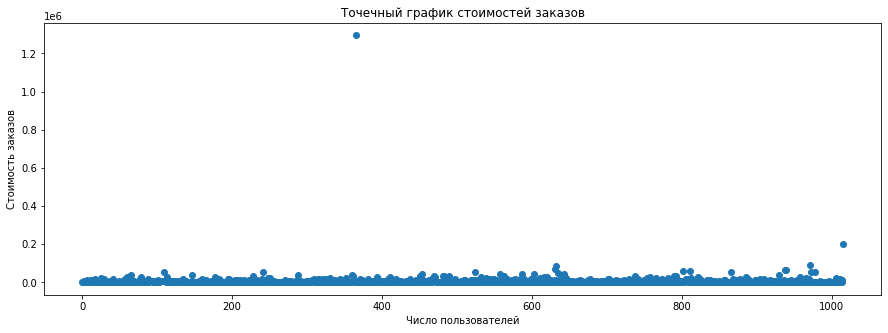

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 
plt.ylabel('Стоимость заказов')
plt.xlabel('Число пользователей')
plt.title('Точечный график стоимостей заказов');

На графике видны характерные выбросы по стоимости заказа(есть даже заказ на сумму больше 1 млн.), что подтверждает первоначальную теорию. 

### Перцентили стоимости заказов.

In [33]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


99% заказов на сумму меньше 58 тыс.рублей и только 5 % свыше 28 тыс. рублей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Воспользуемся U-критерием Манна — Уитни
Проверим гипотезу:
* H0:Среднее количество заказов на посетителя групп A и B равно, статистически значимых отличий нет 
* H1:Среднее количество заказов на посетителя групп A и B различно, статистически значимые отличия есть
 
Применим тест U-критерий Манна — Уитни

α=5% критический уровень статистической значимости.

Начнём с подготовки данных.

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Посчитаем статистическую значимость различия в среднем количестве  заказов на посетителя между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Список индексов создали функцией np.arange(). Она работает так же, как функция range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series.

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().
Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [37]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("относительная разница между сравниваемыми величинами: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
относительная разница между сравниваемыми величинами: 0.160


Вывод: По «сырым» данным различия в среднем числе заказов  на посетителя групп A и B есть. 
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов  на посетителя между группами нет,  отвергаем. Относительный выйгрыш группы B равен 13.8% — второе число в выводе.

### Статистическая значимость различий в среднем чеке заказа  между группами по «сырым» данным. 

Проверим гипотезу:

* H0:Средние чеки групп A и B равны, статистически значимых отличий нет 
* H1:Средние чеки групп A и B различны, статистически значимые отличия есть
 
α=5% критический уровень статистической значимости.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами:

In [38]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительная разница между сравниваемыми величинами: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
относительная разница между сравниваемыми величинами: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B значительно выше среднего чека группы A.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

* H0:Среднее количество заказов  на посетителя групп A и B равно, статистически значимых отличий нет 
* H1:Среднее количество заказов  на посетителя групп A и B различно, статистически значимые отличия есть
 
α=5% критический уровень статистической значимости.

Найденные выше 95-й и 99-й перцентили средних чеков равны 28к и 58к . А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28к рублей.Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64
55


Всего 86 аномальных пользователей. 

In [41]:
print('Потери в относительном выражении после очистки данных составили:{0:.1f}%'.format(100*abnormalUsers.shape[0]/orders['visitorId'].nunique()))

Потери в относительном выражении после очистки данных составили:5.7%


In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [43]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительная разница между сравниваемыми величинами: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.009
относительная разница между сравниваемыми величинами: 0.189


Вывод: Результаты после очистки поменялись, но не значительно. Вывод остается тем же.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

* H0:Средние чеки групп A и B равны, статистически значимых отличий нет 
* H1:Средние чеки групп A и B различны, статистически значимые отличия есть
 
α=5% критический уровень статистической значимости.

In [44]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительная разница между сравниваемыми величинами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.762
относительная разница между сравниваемыми величинами: -0.022


P-value увеличился, но и разница между сегментами сократилась с 26% практически до 0%. Это говорит о том, что статистически значимых различий по этой метрике между группами нет, а наблюдаемая на неочищенных данных разница как мы и говорили ранее была связана с выбросами.

### ВЫВОД

Анализ показал, что статистически значимых различий в среднем чеке между группами нет, и даже аномальные заказы не смогли повлиять на тестирование. Однако среднее количество заказов на посетителя на протяжении всего теста выше на 13 % у группы В, а после очистки данных на все 15. Это дает нам возможность остановить тест и зафиксировать победу группы В.